## What is the goal of this analysis?

### What is IPL?

There are two datasets in **ipldata** directory that need to be explored
1. deliveries.csv - ball level results
2. matches.csv - match level results and metadata

As mentioned above, these two datasets differ in the level of granularity of data

In [150]:
# As an irrevocable first step, import data into a dataframe for a cursory look at the data

%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font_scale=0.7)

In [9]:
deliveries_df = pd.read_csv('ipldata/deliveries.csv')
matches_df = pd.read_csv('ipldata/matches.csv')

deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [10]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [11]:
deliveries_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [12]:
matches_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


From the cells above, describe function provides stats on numerical columns of the dataset. This data is mostly useful for continuous variables but not categorical variables(represented as numbers). For example, in deliveries_df, wide_runs can be considered as a continuous variable and a mean of 0.03 could have a practical interpretation. However, if you consider *inning* column - the stats don't convey a lot

In [363]:
deliveries_df.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [364]:
matches_df.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

<IPython.core.display.Javascript object>


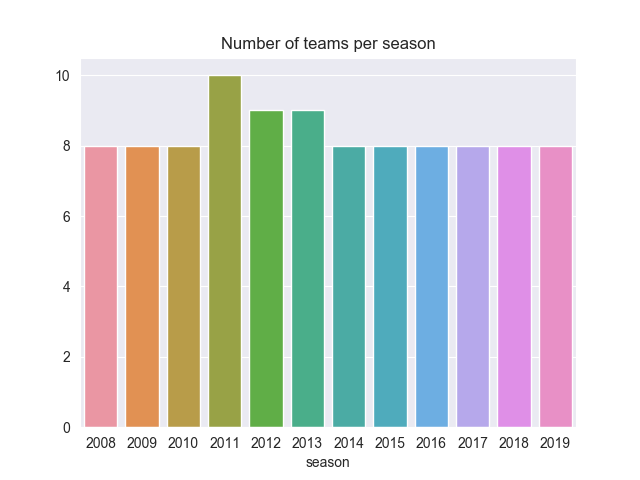

Text(0.5, 1.0, 'Number of teams per season')

In [123]:
#How many teams participate in the league, in each season?
team_names_by_season = matches_df.groupby(['season'])['team1'].unique()

teams_by_season = team_names_by_season.apply(lambda x:len(x))

#PLot teams by season
plt.figure()
sns.barplot(x = teams_by_season.index, y = teams_by_season.tolist())
plt.title('Number of teams per season')

From above it can be seen that the league mostly had *8* teams participate in a season with *3* outliers in terms of season 2011/2012/2013

## Who is a better team in the league?

As the number of teams participating in the league is not consistent through the years, just finding out who the champion is and attributing that as the best team for the season would be unfair for other teams that did not participate in all seasons. To overcome this, calculating win percentage would be a fair metric to decide which teams have performed better

In [270]:
#Calculating win percentages - (total_matches_won/ total_matches_played) * 100 - for each team

# Master set of all teams that ever pariticipated
teams_set = set()
for arr in team_names_by_season:
    teams_set |= set(arr)
teams_set = list(teams_set)    
#total number of matches per team

def get_number_of_matches(team_name, matches_df):
    '''Given a team name and matches_df get total number of matches played by that team'''
    return matches_df[matches_df['team1'] == team_name].shape[0] + matches_df[matches_df['team2'] == team_name].shape[0]
                      
#number of matches as a dictionary - {team_name, count}
num_matches_per_team = {}
for tn in teams_list:
    num_matches_per_team[tn] = get_number_of_matches(tn, matches_df)
num_matches_per_team

{'Kolkata Knight Riders': 178,
 'Chennai Super Kings': 164,
 'Rajasthan Royals': 147,
 'Mumbai Indians': 187,
 'Kings XI Punjab': 176,
 'Royal Challengers Bangalore': 180,
 'Delhi Daredevils': 161,
 'Deccan Chargers': 75,
 'Pune Warriors': 46,
 'Sunrisers Hyderabad': 108,
 'Gujarat Lions': 30,
 'Delhi Capitals': 16}

From above, **Rising Pune Supergiants** and **Rising Pune Supergiant** are the same team, need to make this change in the dict

In [106]:
num_matches_per_team['Rising Pune Supergiants'] = num_matches_per_team['Rising Pune Supergiant'] + num_matches_per_team['Rising Pune Supergiants']
del num_matches_per_team['Rising Pune Supergiant']

In [107]:
num_matches_per_team

{'Kolkata Knight Riders': 178,
 'Chennai Super Kings': 164,
 'Rajasthan Royals': 147,
 'Mumbai Indians': 187,
 'Deccan Chargers': 75,
 'Kings XI Punjab': 176,
 'Royal Challengers Bangalore': 180,
 'Delhi Daredevils': 161,
 'Kochi Tuskers Kerala': 14,
 'Pune Warriors': 46,
 'Sunrisers Hyderabad': 108,
 'Rising Pune Supergiants': 30,
 'Gujarat Lions': 30,
 'Delhi Capitals': 16}

In [114]:
## Number of wins per team
number_wins_per_team = {}

def get_number_of_wins(team_name, matches_df):
    return matches_df[matches_df['winner'] == team_name].shape[0]

for tn in teams_list:
    number_wins_per_team[tn] = get_number_of_wins(tn, matches_df)
    
number_wins_per_team


{'Kolkata Knight Riders': 92,
 'Chennai Super Kings': 100,
 'Rajasthan Royals': 75,
 'Mumbai Indians': 109,
 'Deccan Chargers': 29,
 'Kings XI Punjab': 82,
 'Royal Challengers Bangalore': 84,
 'Delhi Daredevils': 67,
 'Kochi Tuskers Kerala': 6,
 'Pune Warriors': 12,
 'Sunrisers Hyderabad': 58,
 'Rising Pune Supergiants': 5,
 'Gujarat Lions': 13,
 'Rising Pune Supergiant': 10,
 'Delhi Capitals': 10}

In [117]:
# Have to go through the same process again with rising pune supergiants - this where functions come in handy!
def restructure_dict(dict_, team_name, alias):
    dict_[team_name] = dict_[team_name] + dict_[alias]
    del dict_[alias]
    
restructure_dict(number_wins_per_team, "Rising Pune Supergiants", "Rising Pune Supergiant")

<function __main__.restructure_dict(dict_, team_name, alias)>

In [118]:
number_wins_per_team

{'Kolkata Knight Riders': 92,
 'Chennai Super Kings': 100,
 'Rajasthan Royals': 75,
 'Mumbai Indians': 109,
 'Deccan Chargers': 29,
 'Kings XI Punjab': 82,
 'Royal Challengers Bangalore': 84,
 'Delhi Daredevils': 67,
 'Kochi Tuskers Kerala': 6,
 'Pune Warriors': 12,
 'Sunrisers Hyderabad': 58,
 'Rising Pune Supergiants': 15,
 'Gujarat Lions': 13,
 'Delhi Capitals': 10}

<IPython.core.display.Javascript object>


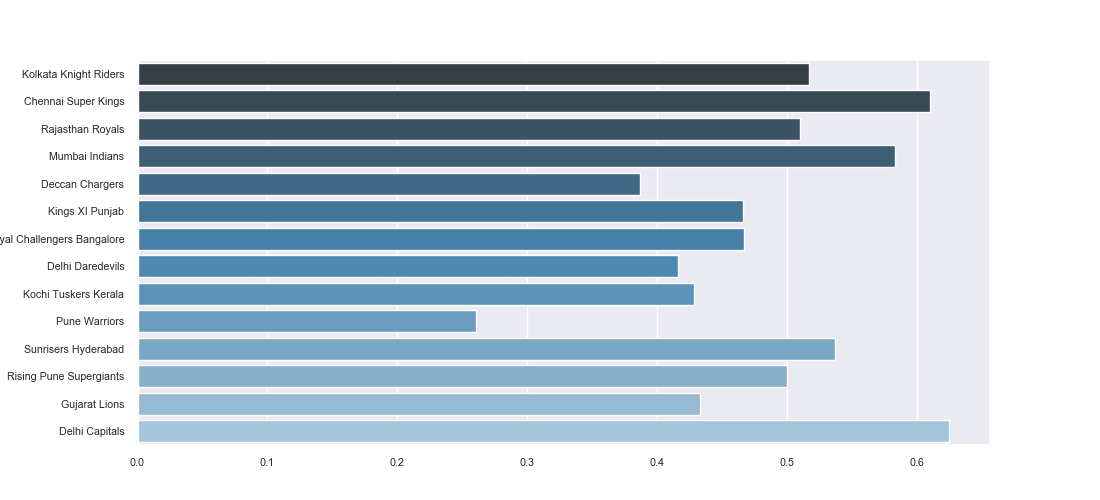

In [218]:
win_percentages = pd.Series(number_wins_per_team) / pd.Series(num_matches_per_team)
plt.figure(figsize=(11,5))
ax = sns.barplot(y = win_percentages.index, x = win_percentages.tolist(), palette="Blues_d")

In [156]:
win_percentages.sort_values(ascending=False)

Delhi Capitals                 0.625000
Chennai Super Kings            0.609756
Mumbai Indians                 0.582888
Sunrisers Hyderabad            0.537037
Kolkata Knight Riders          0.516854
Rajasthan Royals               0.510204
Rising Pune Supergiants        0.500000
Royal Challengers Bangalore    0.466667
Kings XI Punjab                0.465909
Gujarat Lions                  0.433333
Kochi Tuskers Kerala           0.428571
Delhi Daredevils               0.416149
Deccan Chargers                0.386667
Pune Warriors                  0.260870
dtype: float64

 **Delhi capitals** and **Chennai Super Kings** seem to be the most successful teams winning more than 60% of the matches.

How did the teams do in different seasons? This also helps to see the trends in winning percentages 

In [197]:
# Using the previous logic create a function to get win_percentage dict based on a filtered df

def get_win_percentage(matches_df, teams_list):
    num_matches_per_team = {}
    number_wins_per_team = {}
    for tn in teams_list:
        num_matches_per_team[tn] = get_number_of_matches(tn, matches_df)
        number_wins_per_team[tn] = get_number_of_wins(tn, matches_df)
    
    restructure_dict(num_matches_per_team,"Rising Pune Supergiants", "Rising Pune Supergiant")
    restructure_dict(number_wins_per_team,"Rising Pune Supergiants", "Rising Pune Supergiant")
    
    return pd.Series(number_wins_per_team) / pd.Series(num_matches_per_team)


seasons = matches_df['season'].unique()

seasonal_win_percentage = pd.DataFrame(index=teams_set, columns=seasons)

for season in seasons:
    seasonal_win_percentage[season] = get_win_percentage(matches_df[matches_df['season'] == season], teams_list)
    


In [201]:
seasonal_win_percentage

,2017,2008,2009,2010,2011,2012,2013,2014,2015,2016,2018,2019
Rising Pune Supergiants,0.625000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.357143,NaN,NaN
Kochi Tuskers Kerala,NaN,NaN,NaN,NaN,0.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gujarat Lions,0.285714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.562500,NaN,NaN
Mumbai Indians,0.705882,0.500000,0.384615,0.687500,0.625000,0.588235,0.684211,0.466667,0.625000,0.500000,0.428571,0.687500
Rising Pune Supergiant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pune Warriors,NaN,NaN,NaN,NaN,0.285714,0.250000,0.250000,NaN,NaN,NaN,NaN,NaN
Royal Challengers Bangalore,0.230769,0.285714,0.562500,0.500000,0.625000,0.533333,0.562500,0.357143,0.500000,0.562500,0.428571,0.357143
Deccan Chargers,NaN,0.142857,0.562500,0.500000,0.428571,0.266667,NaN,NaN,NaN,NaN,NaN,NaN
Delhi Daredevils,0.428571,0.500000,0.666667,0.500000,0.285714,0.611111,0.187500,0.142857,0.357143,0.500000,0.357143,NaN
Chennai Super Kings,NaN,0.562500,0.571429,0.562500,0.687500,0.555556,0.666667,0.625000,0.588235,NaN,0.687500,0.588235


<IPython.core.display.Javascript object>


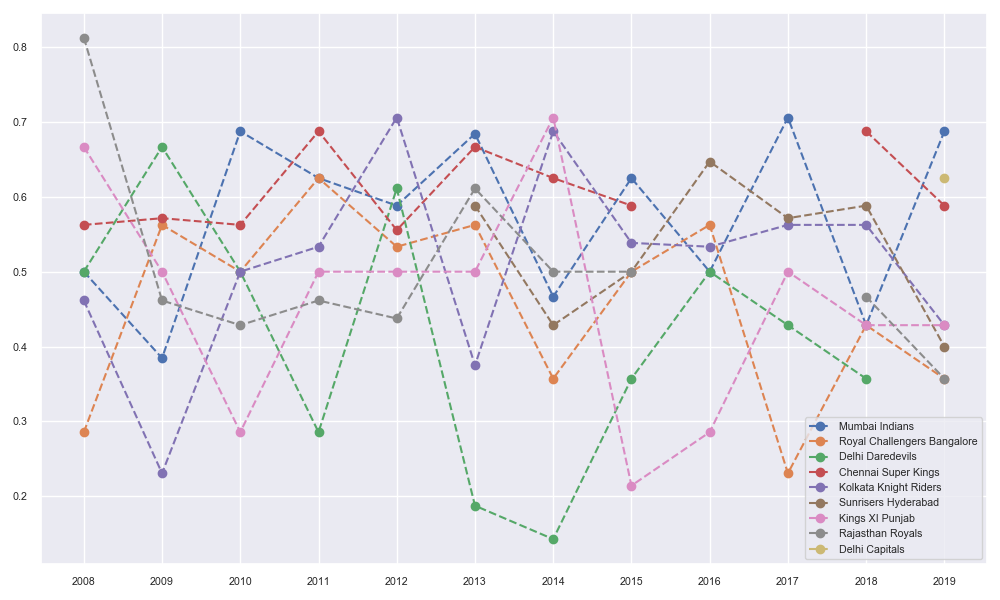

In [250]:
# sns.lineplot(seasonal_win_percentage.loc['Kolkata Knight Riders',:])
plt.figure(figsize=(10,6))
for team in teams_set:
    ax = plt.plot(sorted(seasons), seasonal_win_percentage.loc[team].sort_index(), "--o",label=team)
    
plt.legend()
plt.tight_layout()
plt.xticks(sorted(seasons));

That looks cluttered!

Leveraging the league knowledge, we can remove the teams that are not active any more

In [273]:
# Reomove these teams
teams_to_remove = ['Rising Pune Supergiants', 'Kochi Tuskers Kerala','Gujarat Lions','Rising Pune Supergiant','Deccan Chargers',
                  'Pune Warriors']

for tr in teams_to_remove:
    teams_set.remove(tr)
    

<IPython.core.display.Javascript object>


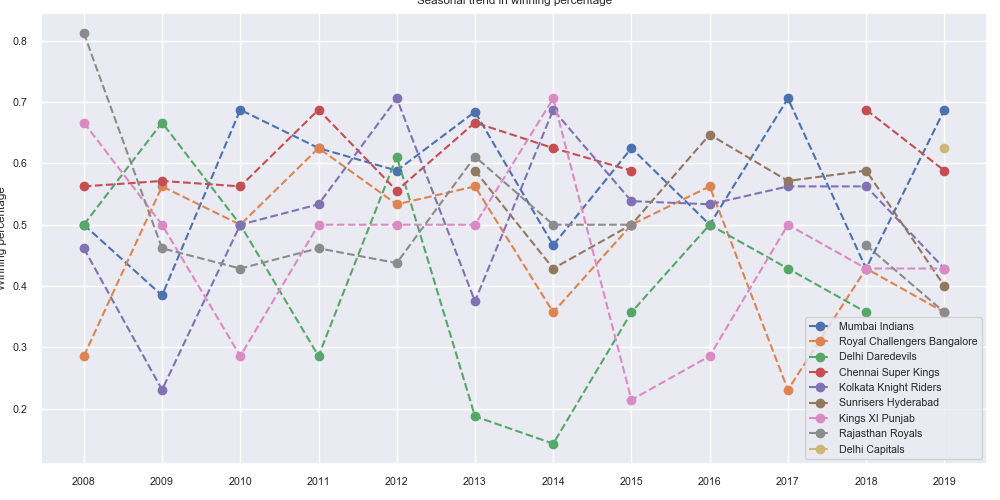

In [249]:
plt.figure(figsize=(10,5))
for team in teams_set:
    ax = plt.plot(sorted(seasons), seasonal_win_percentage.loc[team].sort_index(), "--o",label=team)
     
plt.legend()
plt.tight_layout()
plt.xticks(sorted(seasons));
plt.title('Seasonal trend in winning percentage');
plt.ylabel('Winning percentage');

1. Clearly **Mumbai Indians** is the best team in the current season winning almost 70% of their matches
2. Almost all the teams took a dip in winning percentage from last season
3. **Delhi Daredevils** went through a revamp in 2018 and got rechristened as **Delhi Capitals** - that sure worked out for them in terms of winning percentage for the current season. But its too early to decide
4. **Rajasthan Royals** started out as the best team in the league, but never replicated their initial success


## Captain smartness quantification
The captain, at the start of the match, makes a decision to either field or bat. This decision ultimately leads to win or loss of the game. Captain smartness is measured by how many times the team goes ahaed and wins the game, if they win the toss. This has to be done per season because team strategies change every season and this affects their toss decisions. So this graph would also be a trend like the last one

In [251]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [291]:
def get_captain_smartness(matches_df, team_list):
    smart_dict = {}
    for team in team_list:
        matches_df_filt = matches_df[(matches_df['team1'] == team) | (matches_df['team2'] == team)].copy()
        toss_and_win = matches_df_filt[(matches_df_filt['toss_winner'] == team) & (matches_df_filt['winner'] == team)].shape[0]
        try:
            smart_dict[team] = toss_and_win / matches_df_filt.shape[0]
        except ZeroDivisionError:
            smart_dict[team] = None
    return pd.Series(smart_dict)

    

In [292]:
captain_smart_df = pd.DataFrame(index=teams_set, columns=seasons)
for season in seasons:
    try:
        captain_smart_df[season] = get_captain_smartness(matches_df[matches_df['season'] == season], teams_set)
    except ZeroDivisionError:
        captain_smart_df[season] = None

captain_smart_df

,2017,2008,2009,2010,2011,2012,2013,2014,2015,2016,2018,2019
Mumbai Indians,0.411765,0.285714,0.230769,0.375000,0.187500,0.352941,0.421053,0.200000,0.187500,0.357143,0.142857,0.375000
Royal Challengers Bangalore,0.153846,0.071429,0.312500,0.125000,0.312500,0.200000,0.250000,0.214286,0.375000,0.250000,0.285714,0.142857
Delhi Daredevils,0.357143,0.142857,0.400000,0.357143,0.214286,0.277778,0.000000,0.000000,0.142857,0.357143,0.142857,NaN
Chennai Super Kings,NaN,0.187500,0.285714,0.375000,0.437500,0.222222,0.388889,0.375000,0.294118,NaN,0.500000,0.411765
Kolkata Knight Riders,0.375000,0.230769,0.153846,0.285714,0.333333,0.294118,0.250000,0.375000,0.384615,0.266667,0.312500,0.285714
Sunrisers Hyderabad,0.214286,NaN,NaN,NaN,NaN,NaN,0.058824,0.214286,0.214286,0.411765,0.235294,0.133333
Kings XI Punjab,0.142857,0.266667,0.285714,0.000000,0.285714,0.250000,0.250000,0.294118,0.071429,0.000000,0.285714,0.214286
Rajasthan Royals,NaN,0.562500,0.153846,0.214286,0.307692,0.187500,0.333333,0.285714,0.214286,NaN,0.200000,0.357143
Delhi Capitals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.437500


<IPython.core.display.Javascript object>


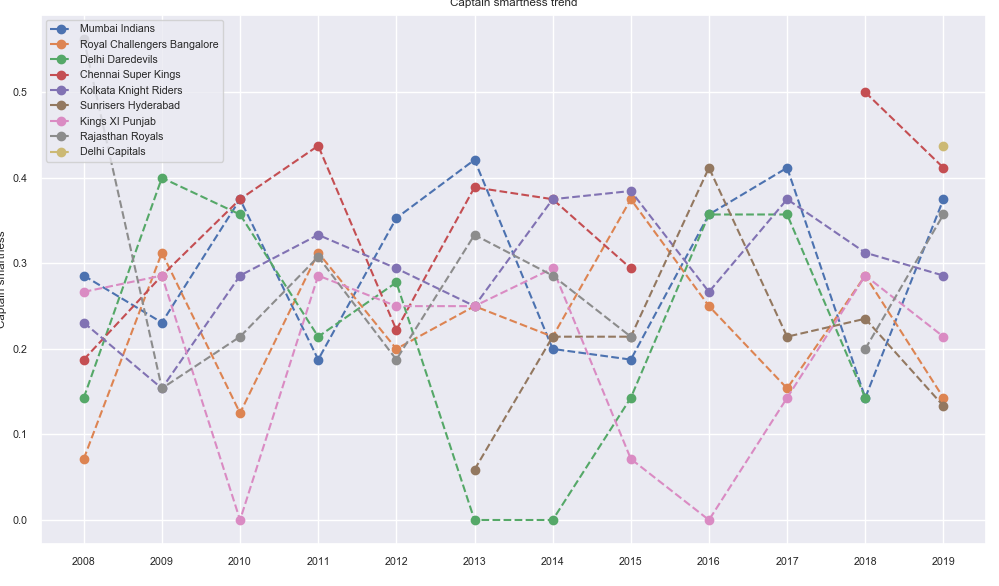

In [294]:
plt.figure(figsize=(10,5))
for team in teams_set:
    ax = plt.plot(sorted(seasons), captain_smart_df.loc[team].sort_index(), "--o",label=team)
     
plt.legend()
plt.tight_layout()
plt.xticks(sorted(seasons));
plt.title('Captain smartness trend');
plt.ylabel('Captain smartness');

1. Chennai Super Kings has a phenomenal captain and strategic team - but for two seasons (2008 and 2012)
2. 2013 and 2014 - Delhi Daredevils had the worst captain

## Do the teams accelerate after 15 overs?

There's an assumption in the viewers and commentators that the teams play more aggressively during the last 5 overs of the game (overs 16-20). In order to check if there is merit to this assumption a one-way statistical t-test can be performed on the mean of runs scored(run_rate) in overs 16-20 compared to overs 1-15. 

In [297]:
pre15_df = deliveries_df[deliveries_df['over'] <= 15]
post15_df = deliveries_df[deliveries_df['over'] > 15]

In [320]:
pre15_runrates = pre15_df.groupby(['match_id','inning','over'])['total_runs'].mean()*6
post15_runrates = post15_df.groupby(['match_id','inning','over'])['total_runs'].mean()*6

<IPython.core.display.Javascript object>


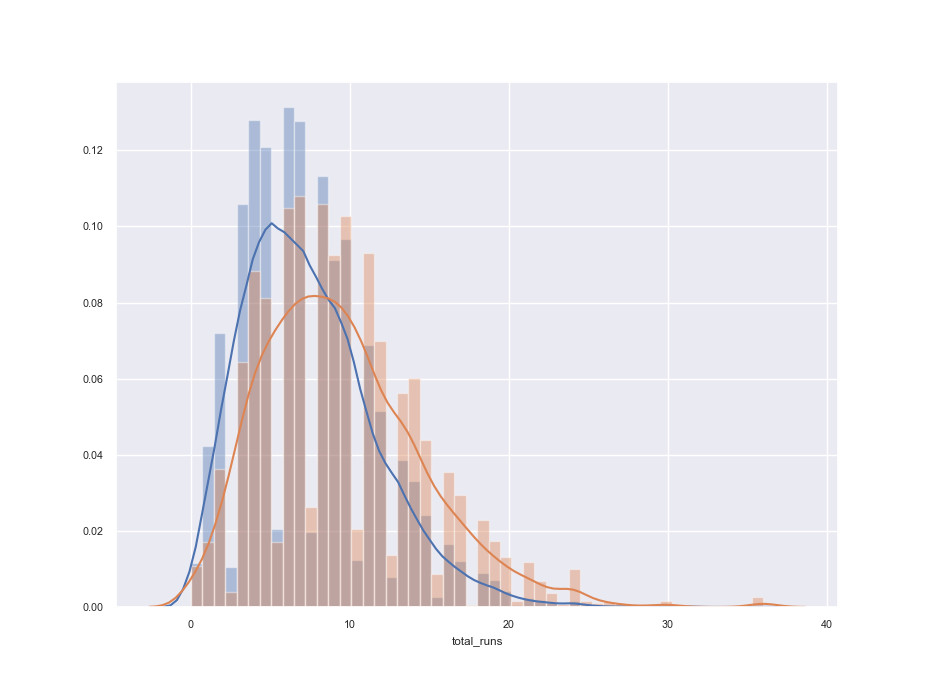

In [331]:
%matplotlib notebook
sns.distplot(pre15_runrates)
sns.distplot(post15_runrates)

In [357]:
print("Post 15 runrates variance: {}".format(np.var(post15_runrates)))
print("Pre 15 runrates variance: {}".format(np.var(pre15_samples)))

Post 15 runrates variance: 25.899082573273603
Pre 15 runrates variance: 17.27563201782963


Variances don't match - this fact should be considered when performing t-test

In [361]:
from scipy import stats
import random

pre15_samples = random.sample(pre15_runrates.tolist(), len(post15_runrates))
post15_samples = post15_runrates.tolist()


results = stats.ttest_ind(post15_samples, pre15_samples, equal_var=False)

In [362]:
print("Test-statistic: {}".format(results[0]))
print("p-value: {}".format(results[1]/2))

Test-statistic: 24.822284181715585
p-value: 3.516438149557092e-133


One-tailed test has been performed in the cell above. At alpha = 0.05, we can safely **reject** the Null Hypothesis and **accept** the alternative of this one-tailed test that **post15_runrate > pre15_runrate**